In [1]:
from keras.models import load_model

Using TensorFlow backend.


In [2]:
import os
folder_name = "models"

def load_model_helper(name):
    models = dict()
    files = sorted(os.listdir(folder_name))
    for f in files:
        if name in f:
            index = f.split("_")[1][:-3]
            models[index] = load_model("{}/{}".format(folder_name,f))
            print("{} {}".format(index,f))
    return models

In [3]:
coin_name = 'raiden-network-token'
models = load_model_helper(coin_name)

1 raiden-network-token_1.h5
10 raiden-network-token_10.h5
11 raiden-network-token_11.h5
12 raiden-network-token_12.h5
13 raiden-network-token_13.h5
14 raiden-network-token_14.h5
15 raiden-network-token_15.h5
16 raiden-network-token_16.h5
17 raiden-network-token_17.h5
18 raiden-network-token_18.h5
19 raiden-network-token_19.h5
2 raiden-network-token_2.h5
20 raiden-network-token_20.h5
21 raiden-network-token_21.h5
22 raiden-network-token_22.h5
23 raiden-network-token_23.h5
24 raiden-network-token_24.h5
3 raiden-network-token_3.h5
4 raiden-network-token_4.h5
5 raiden-network-token_5.h5
6 raiden-network-token_6.h5
7 raiden-network-token_7.h5
8 raiden-network-token_8.h5
9 raiden-network-token_9.h5


In [4]:
from coinmarketcap_draw import coinmarketcap_data

In [5]:
data = coinmarketcap_data(coin_name)

In [6]:
import bulbea as bb
figsize = (20, 15)
% matplotlib inline
share = bb.Share("123",'123',data=data)

/Users/geleichen/Desktop/NewBillions/bloomberg_crypto/lstm_research/gelei_bulbea/bulbea/entity/share.py:174: UserWarning: Environment variable BULBEA_QUANDL_API_KEY for Quandl hasn't been set. A maximum of 50000 calls per day can be made. Visit https://www.quandl.com to get your API key.
  warnings.warn(message)


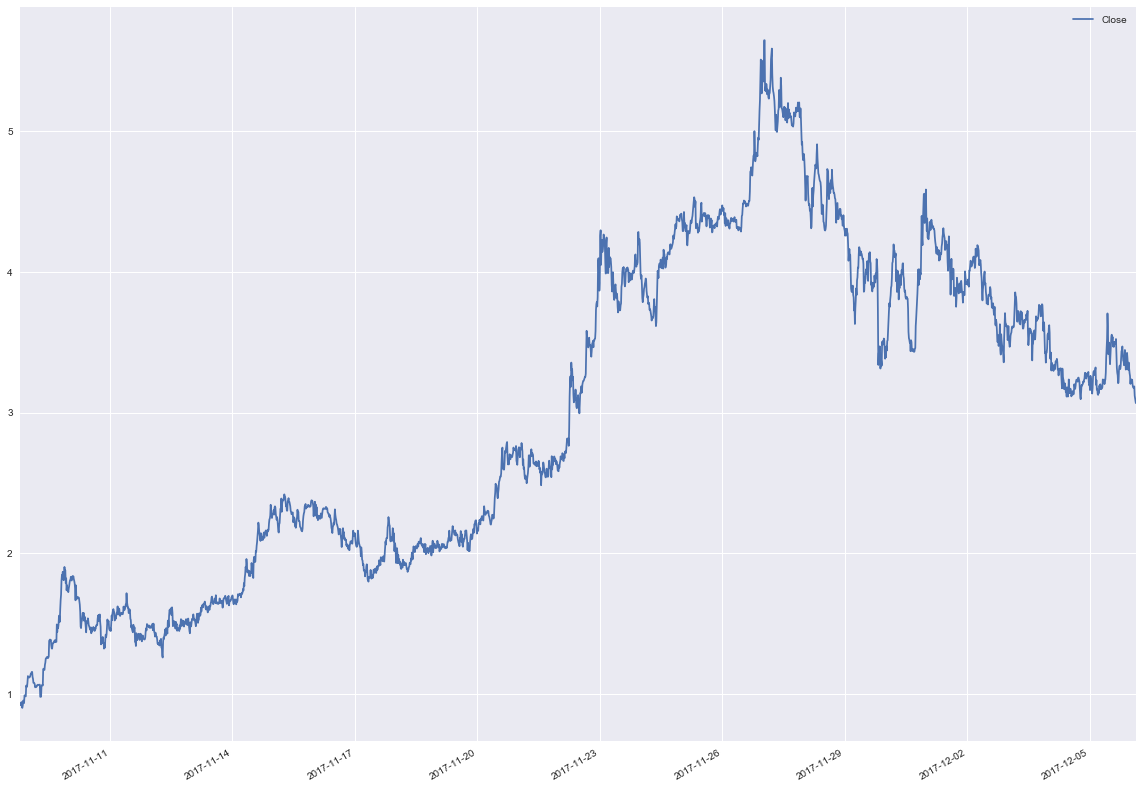

In [7]:
share.plot(figsize = figsize)

##  Convert the data to hourly

In [8]:
from datetime import timedelta
import pandas as pd

def convert_with_n_hour_gap(data,n):
    times = data.index.copy()
    first_time = times[0].to_datetime()
    v_dict = dict()
    
    for x in range(1,len(times)):
        t = times[x].to_datetime()
        if n == 24:
            success = t.day == first_time.day + 1
        else:
            success = (first_time + timedelta(hours=n)).hour == t.hour
        if success:
            first_time = t
            index = pd.Timestamp(t)
            v_dict[index] = data.loc[index]['Close']
    df = pd.DataFrame(list(v_dict.items()), columns=['Date', 'Close'])
    df.set_index("Date",inplace=True)
    return df

In [9]:
share_array = []
for i in range(1,25):
    df = convert_with_n_hour_gap(data,i)
    share = bb.Share("123",'123',data=df)
    share_array.append(share)

/Users/geleichen/Desktop/NewBillions/bloomberg_crypto/lstm_research/gelei_bulbea/bulbea/entity/share.py:174: UserWarning: Environment variable BULBEA_QUANDL_API_KEY for Quandl hasn't been set. A maximum of 50000 calls per day can be made. Visit https://www.quandl.com to get your API key.
  warnings.warn(message)


## visualize the 24 hour data

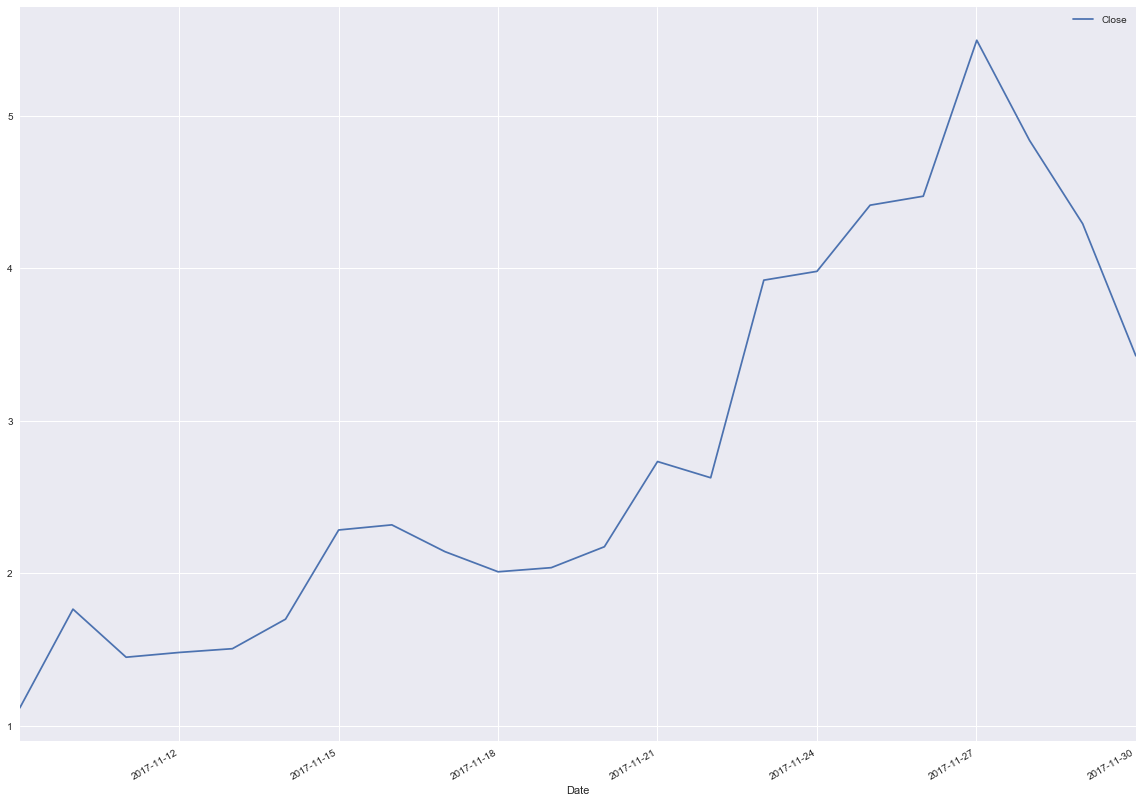

In [10]:
% matplotlib inline
share_array[-1].plot(['Close'], figsize = (20, 15), bollinger_bands = True, period = 100, bandwidth = 2)

## visualize the 1 hour data

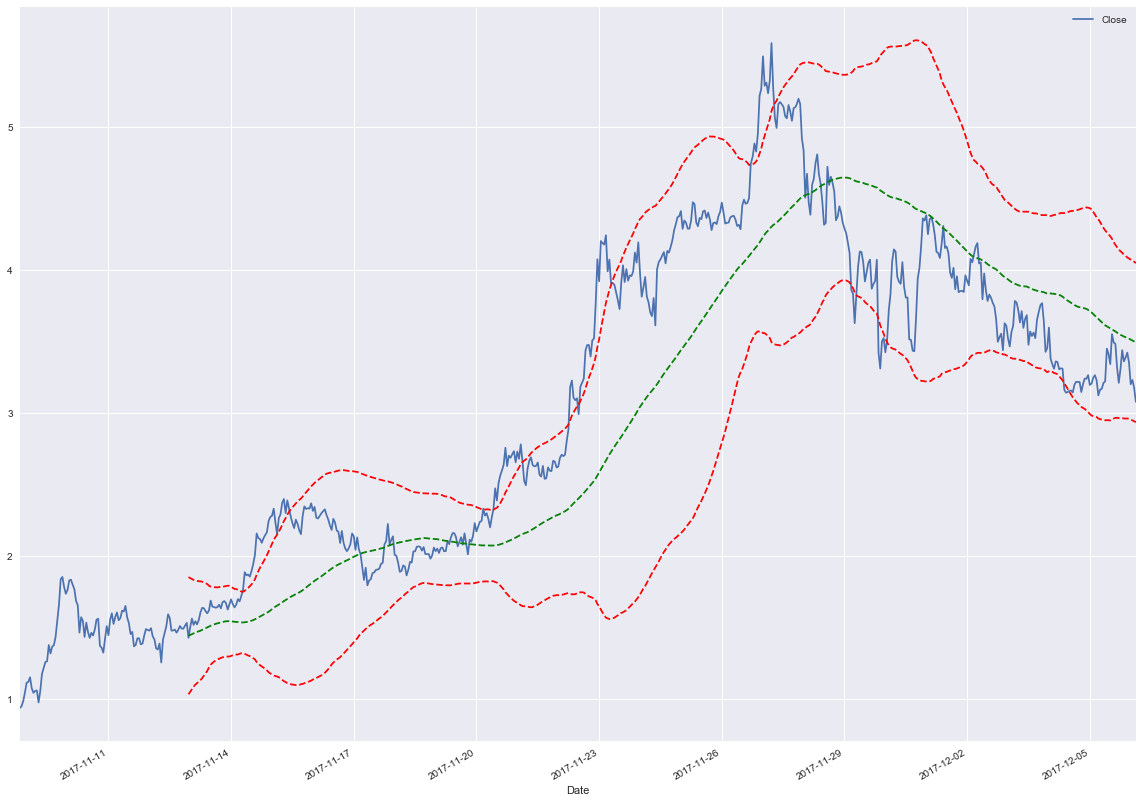

In [11]:
% matplotlib inline
share_array[0].plot(['Close'], figsize = (20, 15), bollinger_bands = True, period = 100, bandwidth = 2)

In [12]:
from bulbea.entity.share import _reverse_cummulative_return

def rever_back(ori_ytest,predicted):
    new_pre = []
    for x in range(0,len(ori_ytest)):
        t = ori_ytest[x]
        predict = predicted[x]
        new_pre.append(_reverse_cummulative_return(t,predict))
    return new_pre

In [13]:
from datetime import timedelta
import pandas as pd
from bulbea.learn.evaluation import split
import numpy as np

def predict_next_from_current_share(var_share,model):
    _, Xtest, _, ytest = split(var_share, 'Close', normalize = True, train = 0.0)
    _,ori_Xtest,_,ori_ytest = split(var_share, 'Close', normalize = False, train = 0.0)
    Xtest  = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1))

    # Format the Xtest
    last_Xtest = Xtest[-1:]
    last_Xtest  = np.reshape(last_Xtest, (last_Xtest.shape[0], last_Xtest.shape[1], 1))
    
    # Format the ori_ytest
    last_ori_ytest = ori_ytest[-1]
    
    # Get the prediction
    predict = model.predict(last_Xtest)
    
    # convert it back
    new_pre = rever_back([last_ori_ytest],[predict])[0][0][0]
    return new_pre

def predict_next_n_hours(n):
    for i in range(n):
        loop_share = share_array[i]
        model = models[str(i+1)]
        new_pre = predict_next_from_current_share(loop_share,model)
        print("\t\tnext {} hour price ${}".format(i+1,new_pre))

In [14]:
predict_next_n_hours(24)

7 649
7 649
		next 1 hour price $3.0407614707946777
3 325
3 325
		next 2 hour price $3.2419190406799316
2 216
2 216
		next 3 hour price $3.5090653896331787
2 162
2 162
		next 4 hour price $3.4297451972961426
2 129
2 129
		next 5 hour price $3.4659674167633057
2 107
2 107
		next 6 hour price $3.529245376586914
2 91
2 91
		next 7 hour price $3.578111171722412
2 80
2 80
		next 8 hour price $3.5627880096435547
2 70
2 70
		next 9 hour price $3.556060791015625
2 63
2 63
		next 10 hour price $3.5481278896331787
2 57
2 57
		next 11 hour price $3.3993308544158936
2 52
2 52
		next 12 hour price $3.3558411598205566
2 48
2 48
		next 13 hour price $3.3982315063476562
2 44
2 44
		next 14 hour price $3.3915436267852783
2 41
2 41
		next 15 hour price $3.402244806289673
2 39
2 39
		next 16 hour price $3.622623920440674
2 36
2 36
		next 17 hour price $3.4066567420959473
2 34
2 34
		next 18 hour price $3.4044315814971924
2 32
2 32
		next 19 hour price $3.457294464111328
2 30
2 30
		next 20 hour price $3.

In [15]:
data.tail(3)

,market_cap,price_btc,price_usd,volume_usd,volume_token,Close
2017-12-06 02:49:00,155511850.0,0.000256,3.10100,13675200.0,4.409932e+06,3.10100
2017-12-06 03:04:00,154492824.0,0.000253,3.08068,13622500.0,4.421913e+06,3.08068
2017-12-06 03:14:00,153832864.0,0.000251,3.06752,13518300.0,4.406915e+06,3.06752


{'1': <keras.models.Sequential object at 0x121508860>, '10': <keras.models.Sequential object at 0x1215087b8>, '11': <keras.models.Sequential object at 0x121508198>, '12': <keras.models.Sequential object at 0x1215083c8>, '13': <keras.models.Sequential object at 0x12591c898>, '14': <keras.models.Sequential object at 0x125d56e10>, '15': <keras.models.Sequential object at 0x12a5d7fd0>, '16': <keras.models.Sequential object at 0x12f5bcda0>, '17': <keras.models.Sequential object at 0x1304d3e80>, '18': <keras.models.Sequential object at 0x1326fc748>, '19': <keras.models.Sequential object at 0x134e81a20>, '2': <keras.models.Sequential object at 0x1321bcdd8>, '20': <keras.models.Sequential object at 0x133038630>, '21': <keras.models.Sequential object at 0x1326e5c88>, '22': <keras.models.Sequential object at 0x136a8eb70>, '23': <keras.models.Sequential object at 0x135db3dd8>, '24': <keras.models.Sequential object at 0x13eac17b8>, '3': <keras.models.Sequential object at 0x140e29b70>, '4': <keras.